In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [ ]:
results = pd.read_csv('/content/150000-total-alc-data-refined-final.csv')


In [ ]:
df = pd.DataFrame(results)
df.head()

,invoice_and_item_number,date,store_name,address,city,zip_code,store_location,county,category,category_name,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-26339100008,4/6/2020,OSCO #1118 / CLINTON,1307 N SECOND,CLINTON,52732.0,POINT(-90.184797 41.858932),CLINTON,1031100,AMERICAN VODKAS,...,35948,FLEISCHMANNS 80PRF VODKA,6,1750,6.50,9.75,30,292.50,52.5,13.86
1,INV-09885200032,1/18/2018,HY-VEE FOOD STORE #3 / DES MOINES,3221 SE 14TH ST,DES MOINES,50315.0,NaN,POLK,1081600,WHISKEY LIQUEUR,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,3000,30.00,45.00,10,450.00,30.0,7.93
2,S19451800009,6/10/2014,HILL BROTHERS JIFFY MART / CEDAR RAP,"1904, MT VERNON RD SE",CEDAR RAPIDS,52403.0,POINT(-91.642561 41.977226),LINN,1031080,VODKA 80 PROOF,...,35913,FIVE O'CLOCK VODKA,48,200,1.13,1.69,48,81.12,9.6,2.54
3,INV-19344800001,5/14/2019,SAM'S CLUB 6432 / SIOUX CITY,4201 S. YORK ST.,SIOUX CITY,51106.0,POINT(-96.37082 42.43407),WOODBURY,1062500,FLAVORED RUM,...,42717,MALIBU COCONUT RUM,12,1000,10.99,16.49,60,989.40,60.0,15.85
4,S32168400003,5/5/2016,FAREWAY STORES #491 / MASON CITY,400 NORTH DELAWARE AVE,MASON CITY,50401.0,POINT(-93.199494 43.155945),CERRO GORDO,1031080,VODKA 80 PROOF,...,36302,HAWKEYE VODKA,48,200,1.15,1.73,240,415.20,48.0,12.68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149141 entries, 0 to 149140
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  149141 non-null  object 
 1   date                     149141 non-null  object 
 2   store_name               149141 non-null  object 
 3   address                  149141 non-null  object 
 4   city                     149141 non-null  object 
 5   zip_code                 149107 non-null  float64
 6   store_location           137185 non-null  object 
 7   county                   149141 non-null  object 
 8   category                 149141 non-null  int64  
 9   category_name            149141 non-null  object 
 10  vendor_number            149140 non-null  float64
 11  vendor_name              149140 non-null  object 
 12  item_number              149141 non-null  int64  
 13  item_description         149141 non-null  object 
 14  pack

In [ ]:
# Function to detect outliers and extreme values using standard deviation

columns_to_check = [
    "pack",
    "bottle_volume_ml",
    "state_bottle_cost",
    "state_bottle_retail",
    "bottles_sold",
    "sale_dollars",
    "volume_sold_liters",
    "volume_sold_gallons",
]

def detect_outliers_sd(data, column, std_dev_threshold=3, extreme_threshold=5):
    mean = data[column].mean()
    std_dev = data[column].std()
    lower_outlier_bound = mean - std_dev_threshold * std_dev
    upper_outlier_bound = mean + std_dev_threshold * std_dev
    lower_extreme_bound = mean - extreme_threshold * std_dev
    upper_extreme_bound = mean + extreme_threshold * std_dev

    # Identify outliers
    outliers = data[
        (data[column] < lower_outlier_bound) | (data[column] > upper_outlier_bound)
    ]

    # Identify extreme values
    extreme_values = data[
        (data[column] < lower_extreme_bound) | (data[column] > upper_extreme_bound)
    ]

    return outliers, extreme_values

# Analyze each column
for col in columns_to_check:
    outliers, extreme_values = detect_outliers_sd(df, col)
    print(f"Column: {col}")
    print(f"Number of outliers (3 SDs): {len(outliers)}")
    print(f"Number of extreme values (5 SDs): {len(extreme_values)}")




Column: pack
Number of outliers (3 SDs): 4226
Number of extreme values (5 SDs): 8
Column: bottle_volume_ml
Number of outliers (3 SDs): 19
Number of extreme values (5 SDs): 14
Column: state_bottle_cost
Number of outliers (3 SDs): 439
Number of extreme values (5 SDs): 226
Column: state_bottle_retail
Number of outliers (3 SDs): 439
Number of extreme values (5 SDs): 226
Column: bottles_sold
Number of outliers (3 SDs): 1136
Number of extreme values (5 SDs): 600
Column: sale_dollars
Number of outliers (3 SDs): 953
Number of extreme values (5 SDs): 553
Column: volume_sold_liters
Number of outliers (3 SDs): 744
Number of extreme values (5 SDs): 476
Column: volume_sold_gallons
Number of outliers (3 SDs): 744
Number of extreme values (5 SDs): 476


In [ ]:
# Function to detect outliers and extreme values using standard deviation
def detect_outliers_sd(data, column, std_dev_threshold=3, extreme_threshold=5):
    mean = data[column].mean()
    std_dev = data[column].std()
    lower_outlier_bound = mean - std_dev_threshold * std_dev
    upper_outlier_bound = mean + std_dev_threshold * std_dev
    lower_extreme_bound = mean - extreme_threshold * std_dev
    upper_extreme_bound = mean + extreme_threshold * std_dev

    # Combine outliers and extreme value conditions
    is_outlier = (data[column] < lower_outlier_bound) | (data[column] > upper_outlier_bound)
    is_extreme = (data[column] < lower_extreme_bound) | (data[column] > upper_extreme_bound)

    return is_outlier | is_extreme

# Create a copy of the DataFrame to preserve the original data
df_cleaned = df.copy()

# Detect and remove rows with outliers and extreme values for each column
for col in columns_to_check:
    outliers_mask = detect_outliers_sd(df_cleaned, col)
    print(f"Column: {col}")
    print(f"Rows removed: {outliers_mask.sum()}")
    # Filter out outlier rows
    df_cleaned = df_cleaned[~outliers_mask]

# Verify the cleaned DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")


Column: pack
Rows removed: 4226
Column: bottle_volume_ml
Rows removed: 19
Column: state_bottle_cost
Rows removed: 1900
Column: state_bottle_retail
Rows removed: 3318
Column: bottles_sold
Rows removed: 908
Column: sale_dollars
Rows removed: 2343
Column: volume_sold_liters
Rows removed: 2041
Column: volume_sold_gallons
Rows removed: 1616
Original DataFrame size: (149141, 22)
Cleaned DataFrame size: (132770, 22)


In [ ]:
# List of columns to check for values below 0
columns_to_check = [
    'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
    'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'
]

# Remove rows where any of the specified columns have values below 0
df_cleaned = df_cleaned[
    (df_cleaned[columns_to_check] >= 0).all(axis=1)
]

# Verify the cleaned DataFrame
print(f"Cleaned DataFrame size after removing values below 0: {df_cleaned.shape}")


Cleaned DataFrame size after removing values below 0: (132752, 22)


In [ ]:
#check for any missed outliers
# Function to detect outliers and extreme values using standard deviation
def detect_outliers_sd(data, column, std_dev_threshold=3, extreme_threshold=5):
    mean = data[column].mean()
    std_dev = data[column].std()
    lower_outlier_bound = mean - std_dev_threshold * std_dev
    upper_outlier_bound = mean + std_dev_threshold * std_dev
    lower_extreme_bound = mean - extreme_threshold * std_dev
    upper_extreme_bound = mean + extreme_threshold * std_dev

    # Identify outliers
    outliers = data[
        (data[column] < lower_outlier_bound) | (data[column] > upper_outlier_bound)
    ]

    # Identify extreme values
    extreme_values = data[
        (data[column] < lower_extreme_bound) | (data[column] > upper_extreme_bound)
    ]

    return outliers, extreme_values

# Analyze each column in df_cleaned
for col in columns_to_check:
    outliers, extreme_values = detect_outliers_sd(df_cleaned, col)
    print(f"Column: {col}")
    print(f"Number of outliers (3 SDs): {len(outliers)}")
    print(f"Number of extreme values (5 SDs): {len(extreme_values)}")


Column: pack
Number of outliers (3 SDs): 4
Number of extreme values (5 SDs): 0
Column: bottle_volume_ml
Number of outliers (3 SDs): 23
Number of extreme values (5 SDs): 0
Column: state_bottle_cost
Number of outliers (3 SDs): 1943
Number of extreme values (5 SDs): 0
Column: state_bottle_retail
Number of outliers (3 SDs): 1947
Number of extreme values (5 SDs): 0
Column: bottles_sold
Number of outliers (3 SDs): 648
Number of extreme values (5 SDs): 508
Column: sale_dollars
Number of outliers (3 SDs): 2074
Number of extreme values (5 SDs): 196
Column: volume_sold_liters
Number of outliers (3 SDs): 2777
Number of extreme values (5 SDs): 0
Column: volume_sold_gallons
Number of outliers (3 SDs): 2777
Number of extreme values (5 SDs): 0


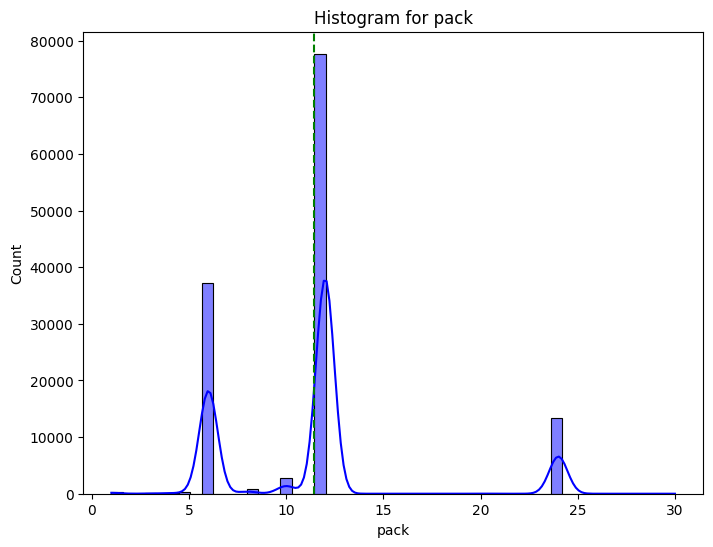

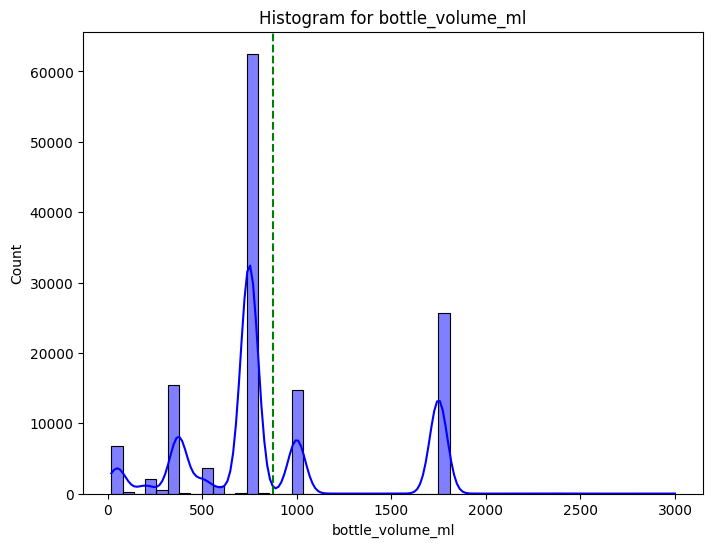

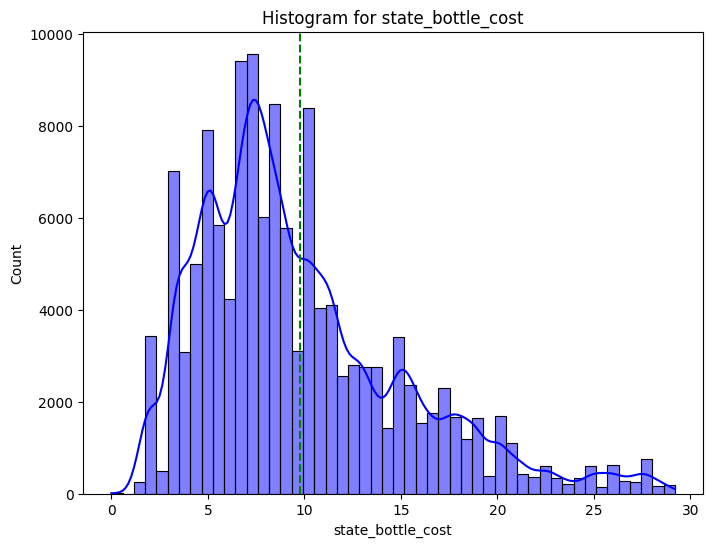

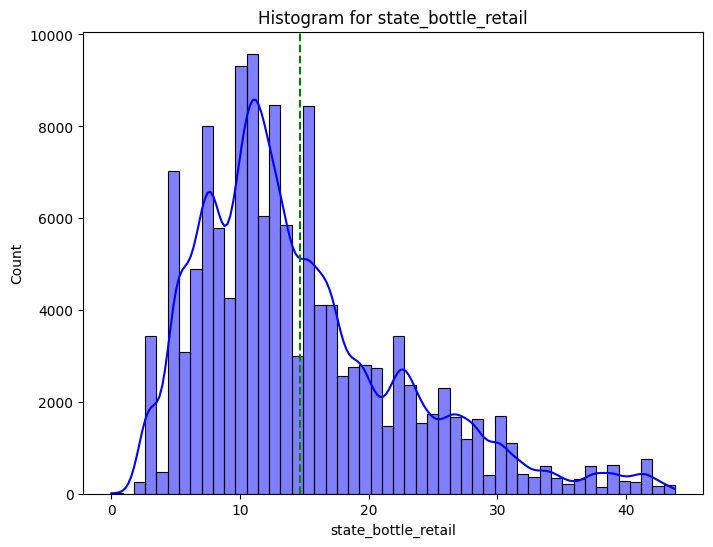

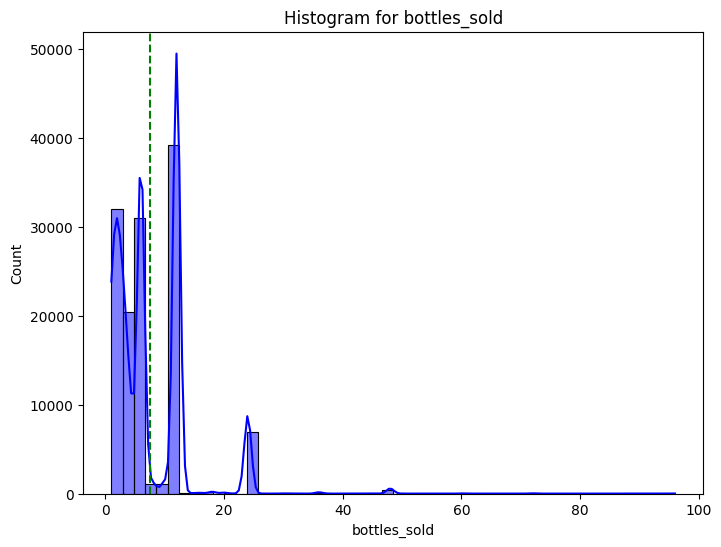

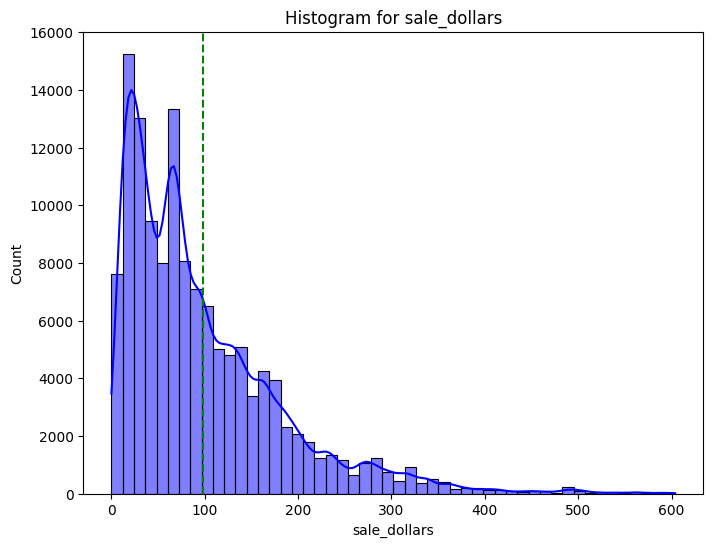

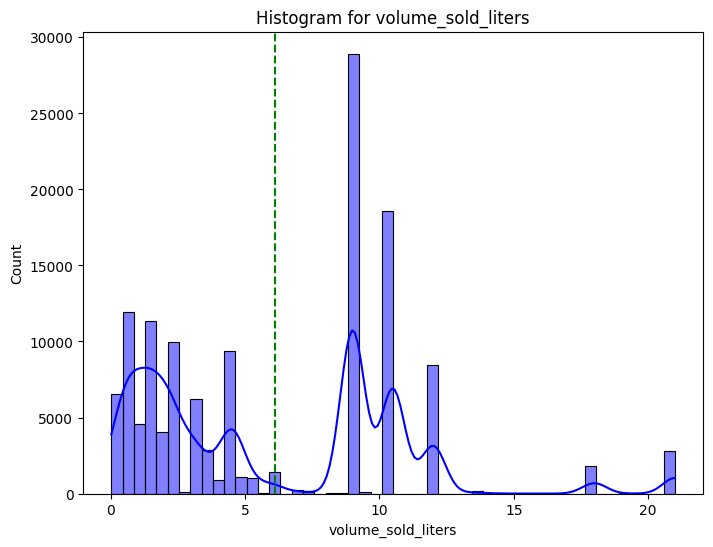

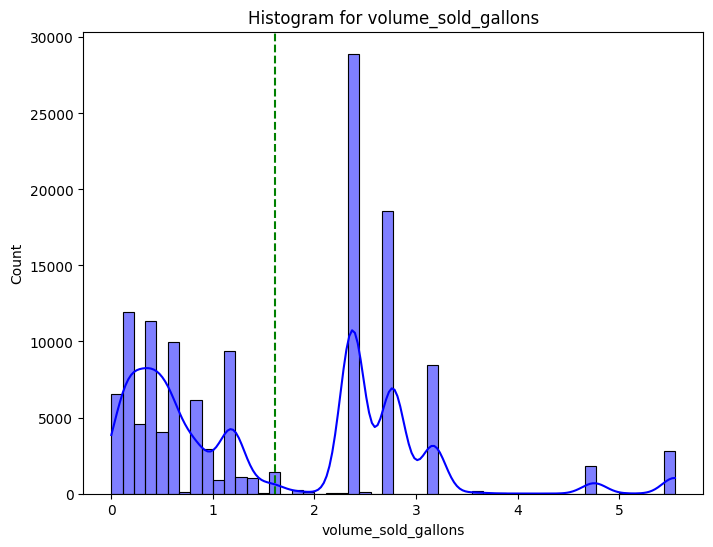

In [ ]:
# Histogram for 'pack'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['pack'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['pack'].mean(), color='green', linestyle='--')
plt.title("Histogram for pack")
plt.show()

# Histogram for 'bottle_volume_ml'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['bottle_volume_ml'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['bottle_volume_ml'].mean(), color='green', linestyle='--')
plt.title("Histogram for bottle_volume_ml")
plt.show()

# Histogram for 'state_bottle_cost'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['state_bottle_cost'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['state_bottle_cost'].mean(), color='green', linestyle='--')
plt.title("Histogram for state_bottle_cost")
plt.show()

# Histogram for 'state_bottle_retail'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['state_bottle_retail'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['state_bottle_retail'].mean(), color='green', linestyle='--')
plt.title("Histogram for state_bottle_retail")
plt.show()

# Histogram for 'bottles_sold'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['bottles_sold'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['bottles_sold'].mean(), color='green', linestyle='--')
plt.title("Histogram for bottles_sold")
plt.show()

# Histogram for 'sale_dollars'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['sale_dollars'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['sale_dollars'].mean(), color='green', linestyle='--')
plt.title("Histogram for sale_dollars")
plt.show()

# Histogram for 'volume_sold_liters'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['volume_sold_liters'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['volume_sold_liters'].mean(), color='green', linestyle='--')
plt.title("Histogram for volume_sold_liters")
plt.show()

# Histogram for 'volume_sold_gallons'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['volume_sold_gallons'], kde=True, bins=50, color='blue')
plt.axvline(df_cleaned['volume_sold_gallons'].mean(), color='green', linestyle='--')
plt.title("Histogram for volume_sold_gallons")
plt.show()

In [ ]:
df_cleaned

,invoice_and_item_number,date,store_name,address,city,zip_code,store_location,county,category,category_name,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
5,INV-08006600006,10/16/2017,QUIK STOP / BURLINGTON,1812 OSBORN ST,BURLINGTON,52601.0,POINT(-91.112658 40.826163),DES MOINES,1032200,IMPORTED FLAVORED VODKA,...,64722,CIROC PEACH,24,200,5.00,7.50,2,15.00,0.40,0.11
6,INV-40730100078,10/6/2021,HY-VEE / WINDSOR HEIGHTS,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311.0,NaN,POLK,1081600,WHISKEY LIQUEUR,...,65013,FIREBALL CINNAMON WHISKEY MINI SLEEVE,12,50,4.30,6.45,24,154.80,1.20,0.31
7,INV-20955800020,7/31/2019,HY-VEE FOOD STORE #1636 / SPENCER,819 N GRAND AVE,SPENCER,51301.0,POINT(-95.14506 43.145897),CLAY,1062400,SPICED RUM,...,43334,CAPTAIN MORGAN SPICED RUM,24,375,5.00,7.50,3,22.50,1.12,0.29
9,INV-15811900006,11/20/2018,HY-VEE GAS / INDIANOLA,912 N JEFFERSON WAY,INDIANOLA,50125.0,POINT(-93.558417 41.36897),WARREN,1011400,TENNESSEE WHISKIES,...,26821,JACK DANIELS OLD #7 BLACK LBL MINI,12,500,9.06,13.59,12,163.08,6.00,1.58
12,S31301900011,3/17/2016,SHADE TREE LIQUORS,90 10TH ST S,NORTHWOOD,50459.0,POINT(-93.218339 43.443739),WORTH,1071100,AMERICAN COCKTAILS,...,62061,KAHLUA FROZEN MUDSLIDE,6,1750,7.99,11.99,3,35.97,5.25,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149134,S23352800051,1/7/2015,MAIN STREET SPIRITS / MAPLETON,311 MAIN ST,MAPLETON,51034.0,POINT(-95.79375 42.165915),MONONA,1081700,DISTILLED SPIRITS SPECIALTY,...,77487,TORTILLA GOLD DSS,12,1000,4.51,6.77,2,13.54,2.00,0.53
149135,S33205300014,7/5/2016,HY-VEE FOOD STORE / SIOUX CENTER,1951 S MAIN AVE,SIOUX CENTER,51250.0,POINT(-96.175695 43.056471),SIOUX,1011200,STRAIGHT BOURBON WHISKIES,...,18407,G & W BOURBON,12,1000,4.94,7.41,2,14.82,2.00,0.53
149136,S05351900081,5/2/2012,HY-VEE WINE AND SPIRITS / PELLA,512 E OSKALOOSA,PELLA,50219.0,POINT(-92.899277 41.396961),MARION,1081317,GRAPE SCHNAPPS,...,82637,DEKUYPER GRAPE PUCKER,12,1000,7.35,11.02,2,22.04,2.00,0.53
149139,S32554800108,5/26/2016,HY-VEE DRUGSTORE / DAVENPORT,2200 WEST KIMBERLY,DAVENPORT,52806.0,POINT(-90.608201 41.560663),SCOTT,1071100,AMERICAN COCKTAILS,...,59037,DESERT ISLAND LONG ISLAND ICE TEA COCKTAIL,12,1000,4.36,6.54,2,13.08,2.00,0.53


In [ ]:
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [ ]:
value_counts = df_cleaned['store_name'].value_counts()

# Print the result
print(value_counts)

store_name
HY-VEE #3 / BDI / DES MOINES                825
HY-VEE FOOD STORE / CEDAR FALLS             816
CENTRAL CITY LIQUOR, INC.                   718
HY-VEE #7 / CEDAR RAPIDS                    691
HY-VEE WINE AND SPIRITS / BETTENDORF        663
                                           ... 
CASEY'S GENERAL STORE - #1762 / ALGONA        1
CASEY'S GENERAL STORE #2185 / MANCHESTER      1
FEISTA FOODS / HARTLEY                        1
HY-VEE / KNOXVILLE                            1
HY-VEE #7 / EDGEWOOD CEDAR RAPIDS             1
Name: count, Length: 3097, dtype: int64


In [ ]:
# Group by county and calculate the median sale_dollars
county_sales_median = df_cleaned.groupby('county')['sale_dollars'].median().reset_index()

# Sort for better visualization
county_sales_median = county_sales_median.sort_values(by='sale_dollars', ascending=False)
county_sales_median

,county,sale_dollars
43,HENRY,99.000
79,RINGGOLD,99.000
95,WINNESHIEK,94.200
41,HARDIN,94.140
33,FLOYD,90.000
...,...,...
57,LOUISA,38.965
65,MITCHELL,34.640
86,TAYLOR,34.490
53,KEOKUK,31.500


from matplotlib import pyplot as plt
county_sales_median['sale_dollars'].plot(kind='hist', bins=20, title='sale_dollars')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
county_sales_median['sale_dollars'].plot(kind='line', figsize=(8, 4), title='sale_dollars')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-33-fdd176313bc0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_sales_median, x='sale_dollars', y='county', palette='viridis')


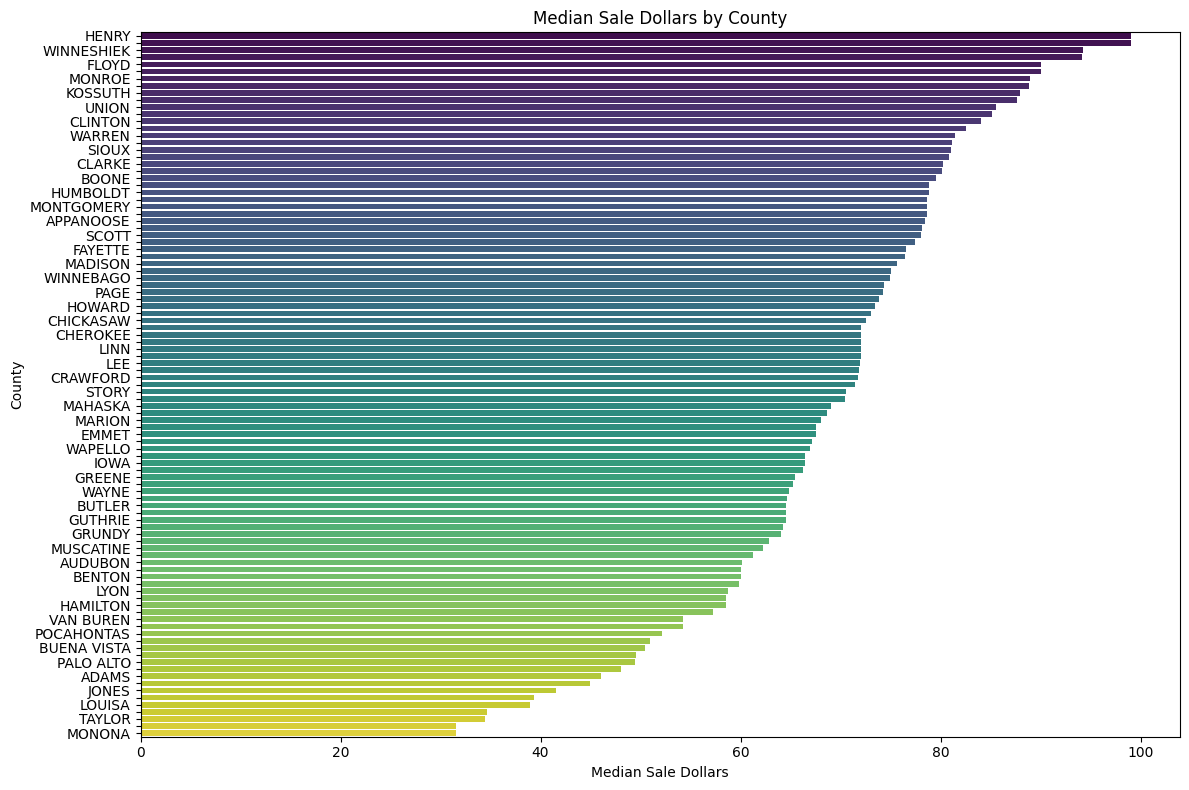

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=county_sales_median, x='sale_dollars', y='county', palette='viridis')

# Space out labels to show every other county
y_labels = plt.gca().get_yticklabels()
for i, label in enumerate(y_labels):
    if i % 2 != 0:  # Hide every other label
        label.set_visible(False)

plt.title("Median Sale Dollars by County")
plt.xlabel("Median Sale Dollars")
plt.ylabel("County")
plt.tight_layout()
plt.show()

In [ ]:
# Ensure the date column is in datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract the year from the date column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Group by county and year to calculate median sale_dollars
median_sales_yearly = df_cleaned.groupby(['county', 'year'])['sale_dollars'].median().reset_index()

In [ ]:
# Group by county to calculate overall median sales
county_overall_median = df_cleaned.groupby('county')['sale_dollars'].median().reset_index()

# Get the top 10 counties with the highest median sales
top_counties = county_overall_median.nlargest(10, 'sale_dollars')['county']

# Filter the yearly data to include only the top 10 counties
filtered_yearly_data = median_sales_yearly[median_sales_yearly['county'].isin(top_counties)]


In [ ]:
# Pivot table to create a time series for each county
pivoted_yearly_data = filtered_yearly_data.pivot(index='year', columns='county', values='sale_dollars')

# Fill missing values with 0 (optional)
pivoted_yearly_data = pivoted_yearly_data.fillna(0)


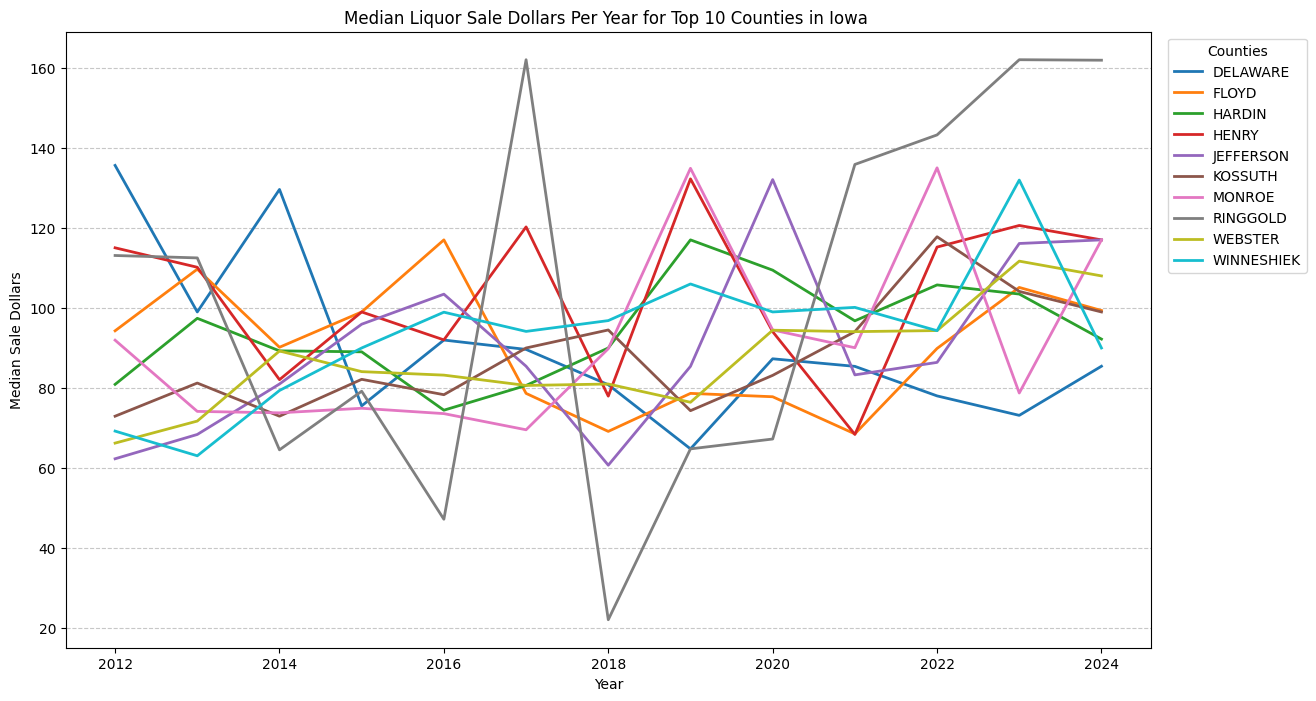

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot each county as a line
for county in pivoted_yearly_data.columns:
    plt.plot(pivoted_yearly_data.index, pivoted_yearly_data[county], label=county, linewidth=2)

plt.title("Median Liquor Sale Dollars Per Year for Top 10 Counties in Iowa ")
plt.xlabel("Year")
plt.ylabel("Median Sale Dollars")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title="Counties")
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [ ]:
# Assign quarters to each date
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['quarter'] = df_cleaned['date'].dt.quarter
df_cleaned['year'] = df_cleaned['date'].dt.year


In [ ]:
# Group by year and quarter to calculate median sales
median_sales_quarterly = (
    df_cleaned.groupby(['year', 'quarter'])['sale_dollars']
    .median()
    .reset_index()
)

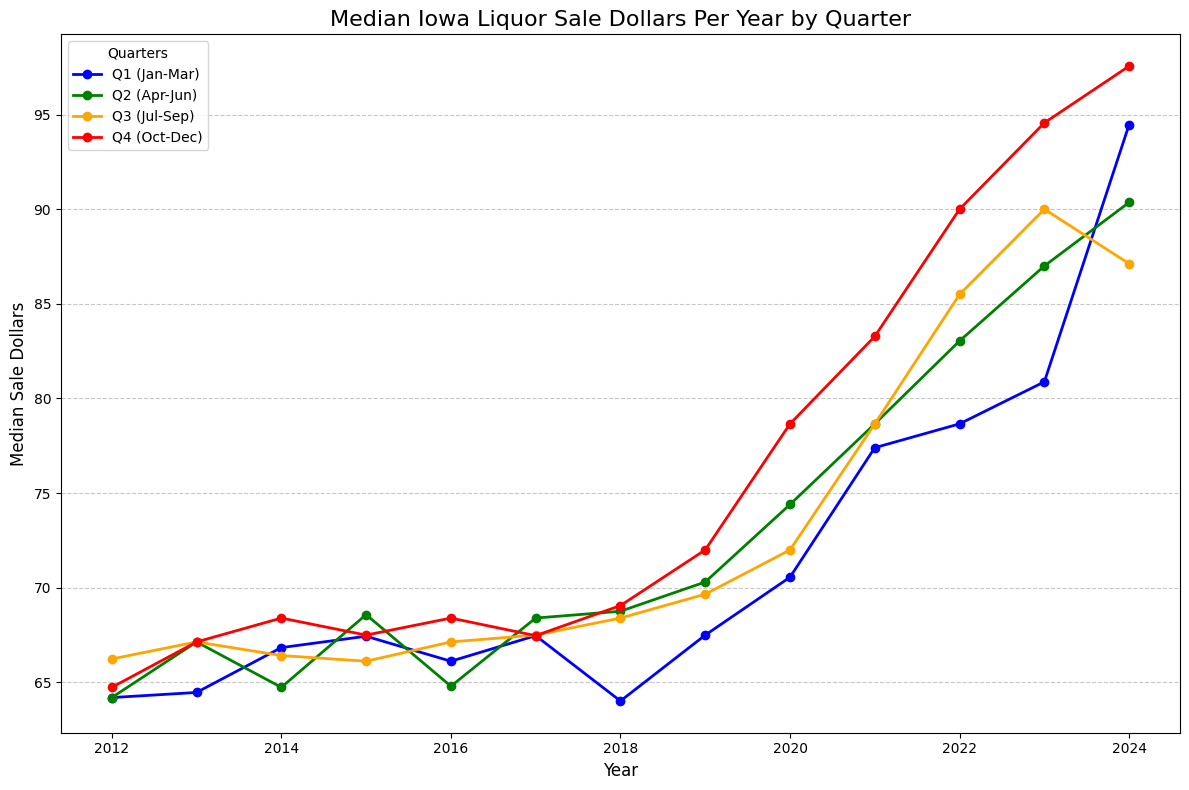

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each quarter
colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}
labels = {1: "Q1 (Jan-Mar)", 2: "Q2 (Apr-Jun)", 3: "Q3 (Jul-Sep)", 4: "Q4 (Oct-Dec)"}

plt.figure(figsize=(12, 8))

# Loop through each quarter and plot
for quarter in median_sales_quarterly['quarter'].unique():
    # Filter data for the current quarter
    quarter_data = median_sales_quarterly[median_sales_quarterly['quarter'] == quarter]

    # Plot data with different colors
    plt.plot(
        quarter_data['year'],
        quarter_data['sale_dollars'],
        label=labels[quarter],
        color=colors[quarter],
        marker='o',
        linewidth=2
    )

# Add titles and labels
plt.title("Median Iowa Liquor Sale Dollars Per Year by Quarter", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Sale Dollars", fontsize=12)
plt.legend(title="Quarters", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Quarter 1 (Q1): January, February, March

Quarter 2 (Q2): April, May, June

Quarter 3 (Q3): July, August, September

Quarter 4 (Q4): October, November, December

In [ ]:
# Group by year and calculate the mean or median for cost and retail
cost_retail_yearly = (
    df_cleaned.groupby('year')[['state_bottle_cost', 'state_bottle_retail']]
    .mean()  # Replace `.mean()` with `.median()` if preferred
    .reset_index()
)

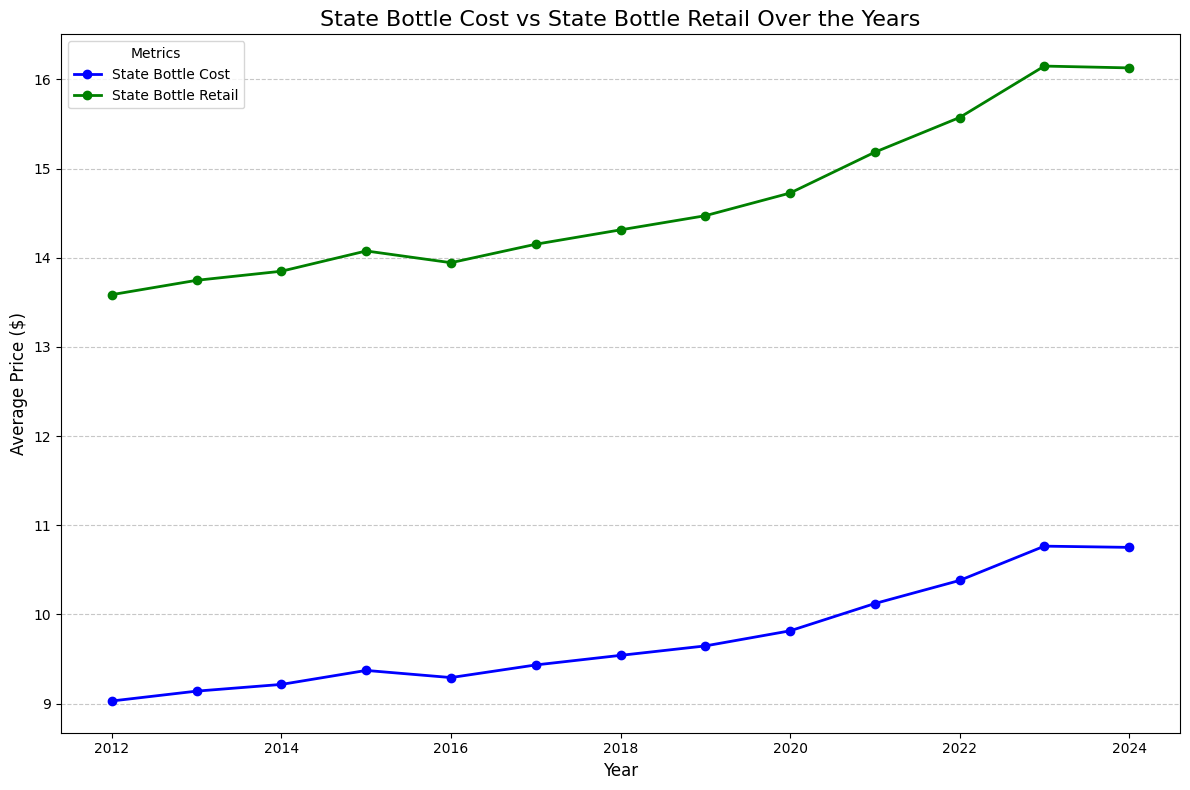

In [ ]:
plt.figure(figsize=(12, 8))

# Plot state bottle cost
plt.plot(
    cost_retail_yearly['year'],
    cost_retail_yearly['state_bottle_cost'],
    label='State Bottle Cost',
    color='blue',
    marker='o',
    linewidth=2
)

# Plot state bottle retail
plt.plot(
    cost_retail_yearly['year'],
    cost_retail_yearly['state_bottle_retail'],
    label='State Bottle Retail',
    color='green',
    marker='o',
    linewidth=2
)

# Add titles and labels
plt.title("State Bottle Cost vs State Bottle Retail Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the percentage markup for each row
df_cleaned['percentage_markup'] = (
    (df_cleaned['state_bottle_retail'] - df_cleaned['state_bottle_cost']) /
    df_cleaned['state_bottle_cost'] * 100
)

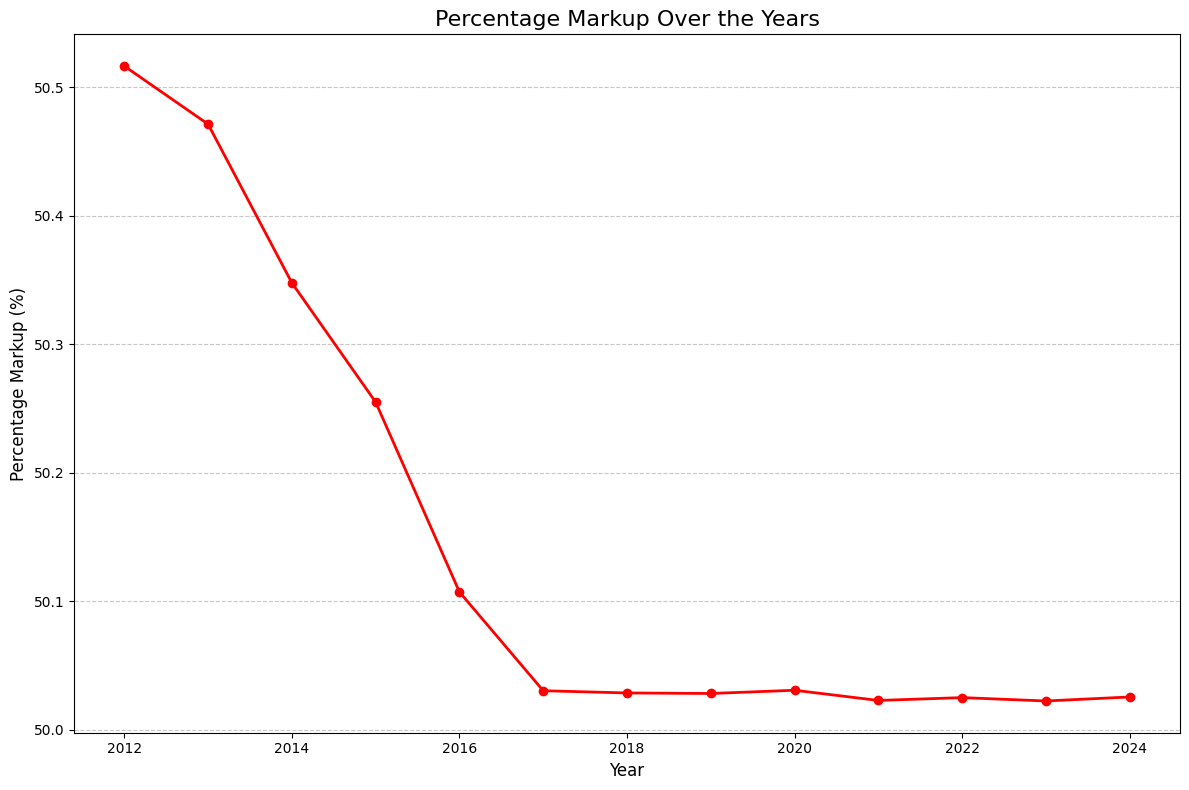

In [ ]:
plt.figure(figsize=(12, 8))

# Plot percentage markup
plt.plot(
    cost_retail_markup_yearly['year'],
    cost_retail_markup_yearly['percentage_markup'],
    label='Percentage Markup',
    color='red',
    marker='o',
    linewidth=2
)

# Add titles and labels
plt.title("Percentage Markup Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Markup (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert 'date' to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract year and month from the date
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month


In [ ]:
# Group by year and month to calculate total sales
monthly_sales = (
    df_cleaned.groupby(['year', 'month'])['sale_dollars']
    .sum()
    .reset_index()
)


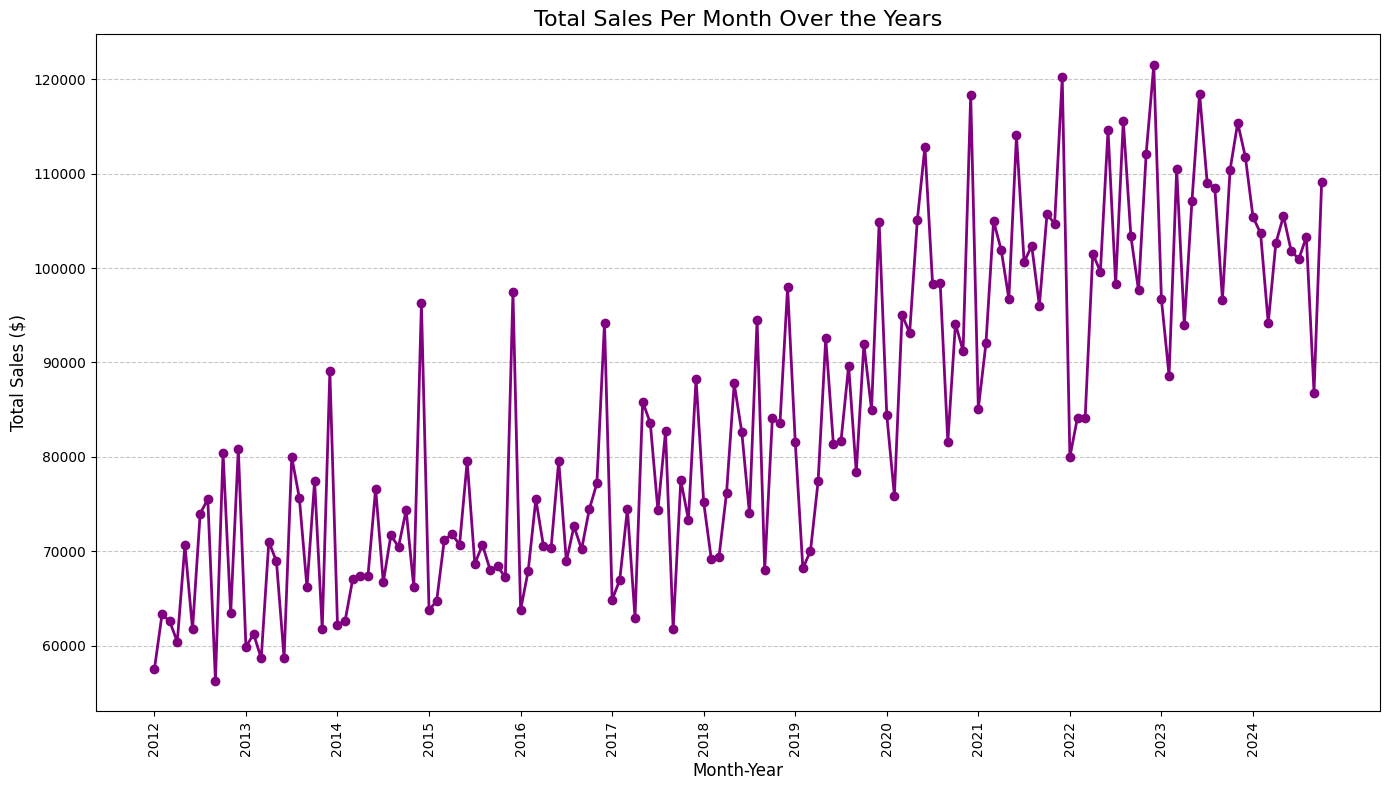

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for 'Month-Year' to make it easier to label on the x-axis
monthly_sales['month_year'] = monthly_sales['month'].astype(str) + '-' + monthly_sales['year'].astype(str)

# Create the plot
plt.figure(figsize=(14, 8))

# Plot total sales per month over the years
plt.plot(
    monthly_sales['month_year'],
    monthly_sales['sale_dollars'],
    marker='o',
    color='purple',
    linewidth=2
)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Customize the x-axis labels to show the year only when a new year starts
plt.xticks(
    ticks=range(0, len(monthly_sales), 12),  # Every 12th label (i.e., start of each new year)
    labels=[str(year) for year in monthly_sales['year'][::12]],  # Extract the first year of each group
)

# Add titles and labels
plt.title("Total Sales Per Month Over the Years", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Ensure the 'date' column is in datetime format and extract the year
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['year'] = df_cleaned['date'].dt.year

# Group by vendor_name and year, then sum the sales dollars
vendor_sales_per_year = (
    df_cleaned.groupby(['vendor_name', 'year'])['sale_dollars']
    .sum()
    .reset_index()
)

In [ ]:
# Sort by year and sales to get the vendor with the most sales
top_vendors_per_year = vendor_sales_per_year.sort_values(by=['year', 'sale_dollars'], ascending=[True, False])

# Get the vendor with the most sales for each year
top_vendors_per_year = top_vendors_per_year.groupby('year').head(1)

In [ ]:
print(top_vendors_per_year)


         vendor_name  year  sale_dollars
265  DIAGEO AMERICAS  2012     159218.86
266  DIAGEO AMERICAS  2013     174015.33
267  DIAGEO AMERICAS  2014     167958.16
268  DIAGEO AMERICAS  2015     180181.90
269  DIAGEO AMERICAS  2016     184374.03
270  DIAGEO AMERICAS  2017     187530.26
271  DIAGEO AMERICAS  2018     197377.55
272  DIAGEO AMERICAS  2019     192993.61
273  DIAGEO AMERICAS  2020     221664.00
274  DIAGEO AMERICAS  2021     233586.71
275  DIAGEO AMERICAS  2022     233367.21
276  DIAGEO AMERICAS  2023     241162.53
277  DIAGEO AMERICAS  2024     180304.66
